In [105]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
df= pd.read_csv("Social_Network_Ads.csv")

In [107]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [108]:
df1 = df.iloc[:,2:] # The 2: after the comma means that we want to select columns starting from the third column (index 2) until the last column.


In [109]:
df1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [110]:
df1.sample(5)

,Age,EstimatedSalary,Purchased
291,49,89000,1
79,26,17000,0
80,30,80000,0
365,59,29000,1
68,22,63000,0


TRAIN TEST SPLIT 

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(df1.drop('Purchased', axis=1),
                                               df1['Purchased'],
                                               test_size=0.3,
                                               random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [112]:
# standardscaler

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit the scaler to train set , it ewill learn the parameters 
scaler.fit(X_train)
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [114]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [115]:
X_train


,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [116]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [117]:
X_train_scaled =pd.DataFrame(X_train_scaled , columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns=X_test.columns)

In [118]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [119]:
np.round(X_train.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [120]:
#np.round(): This function is from the NumPy library. It rounds the values of the DataFrame or Series to the specified number of decimal places.
np.round(X_train_scaled.describe() , 1) # the number 1 is specifying the number of decimal places to round the values to.

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of scaling

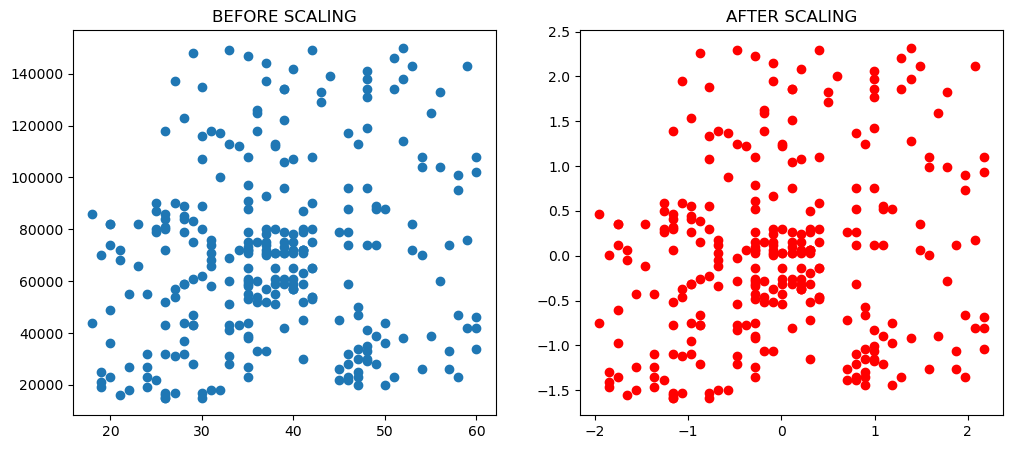

In [121]:
fig , (ax1,ax2) =plt.subplots(ncols=2 , figsize=(12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("BEFORE SCALING")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("AFTER SCALING")
plt.show()

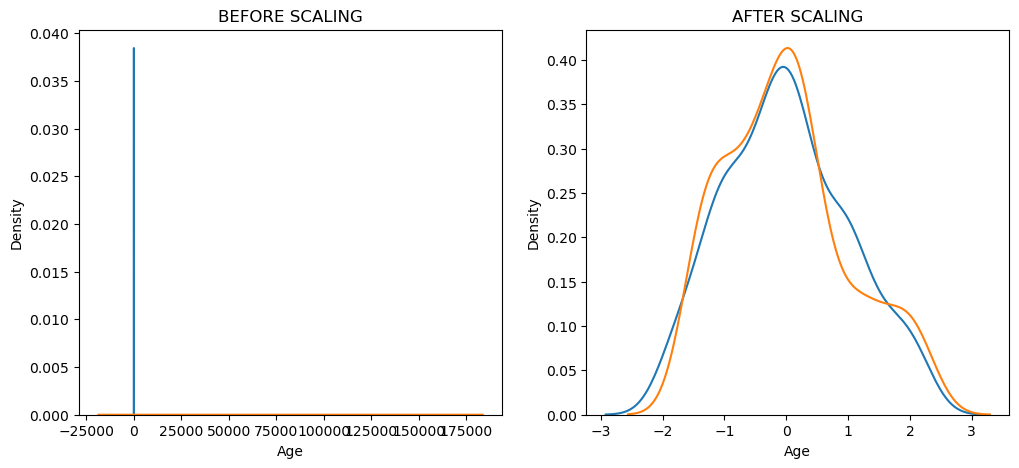

In [39]:
fig , (ax1, ax2) =plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('BEFORE SCALING')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax =ax1)
#after scaling
ax2.set_title('AFTER SCALING')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

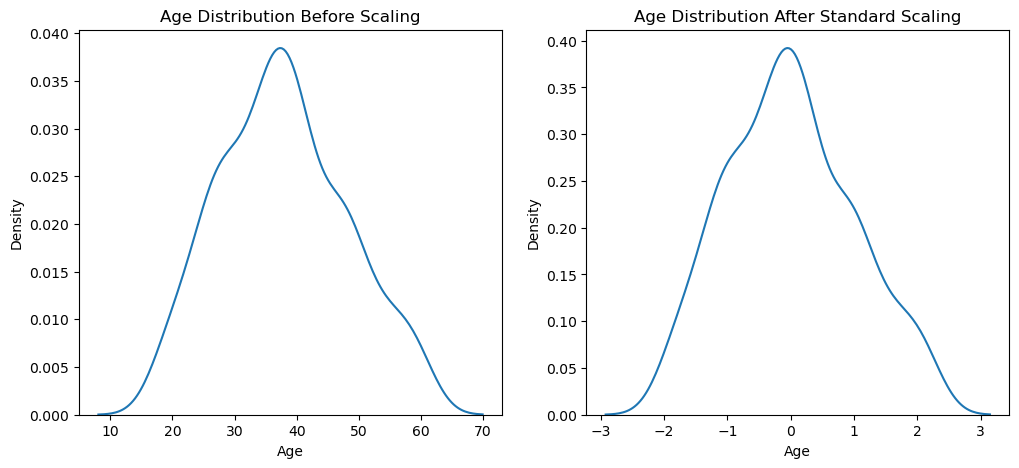

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

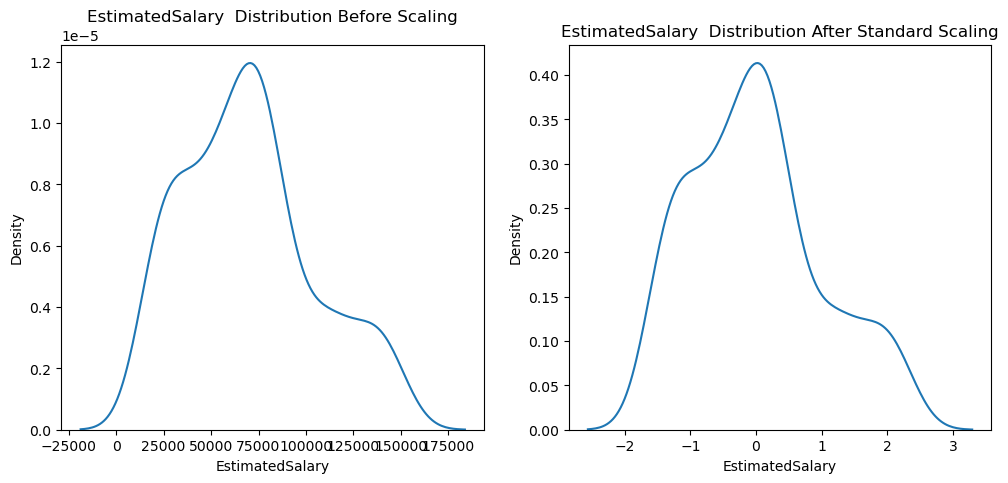

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('EstimatedSalary  Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('EstimatedSalary  Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# WHY scaling is important

In [43]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr =LogisticRegression()
lr_scaled =LogisticRegression()

In [47]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled, Y_train)

LogisticRegression()

In [48]:
y_pred =lr.predict(X_test)
y_pred_scaled =lr_scaled.predict(X_test_scaled)


In [49]:
from sklearn.metrics import accuracy_score

In [51]:
print("Actual", accuracy_score(Y_test,y_pred))
print("Scaled", accuracy_score(Y_test,y_pred_scaled))


Actual 0.6583333333333333
Scaled 0.8666666666666667


In [53]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt =DecisionTreeClassifier()
dt_scaled =DecisionTreeClassifier()

In [69]:
dt.fit(X_train, Y_train)
dt_scaled.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [76]:
y_pred =dt.predict(X_test)
y_pred_scaled =dt_scaled.predict(X_test_scaled)

In [78]:
print("Actual ", accuracy_score(Y_test,y_pred))
print("Scaled ", accuracy_score(Y_test,y_pred_scaled))


Actual  0.875
Scaled  0.875


# effect of outlier 

<Axes: >

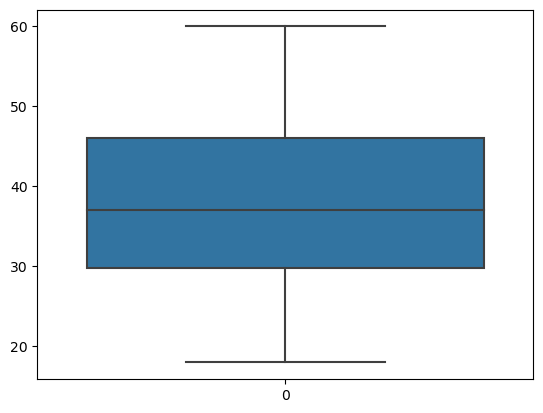

In [123]:
sns.boxplot(df1['Age']) # there are no outlier in sample data

In [152]:
df_concatenated = pd.concat([df1, pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0, 1, 1]})], ignore_index=True)


In [153]:
df_concatenated

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


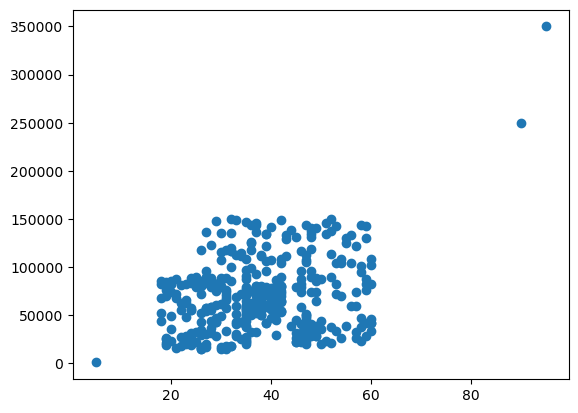

In [154]:
plt.scatter(df_concatenated['Age'] , df_concatenated['EstimatedSalary'])

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [156]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

StandardScaler()

In [157]:
# transform train and test sets
X_train_scaled =scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [162]:
X_train_scaled =pd.DataFrame(X_train_scaled , columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

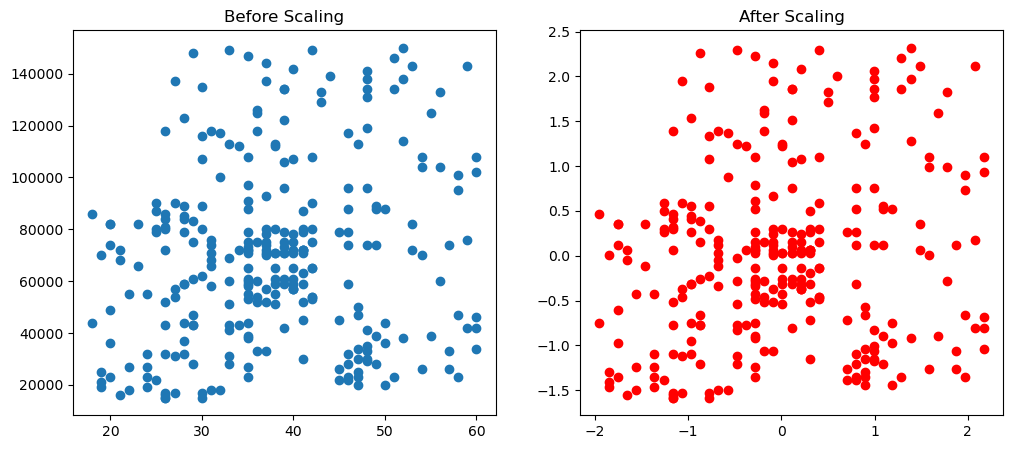

In [163]:
import pandas as pd
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()